In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv('my_movies.csv')
movies=movies.iloc[:,5:]

<ipython-input-3-e86afdcd01e2>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

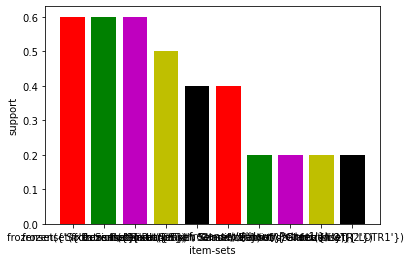

In [3]:
#Apriori Algorithm
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(movies,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [4]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [5]:
# To eliminate Redudancy in Rules
def to_list(i):
    return (sorted(list(i)))

In [6]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [7]:
ma_X = ma_X.apply(sorted)

In [8]:
rules_sets = list(ma_X)

In [9]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [10]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [11]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
16,"(Sixth Sense, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
114,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
92,"(Sixth Sense, Green Mile)",(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
72,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
86,"(Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
118,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
32,"(Sixth Sense, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
48,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [12]:
frequent_itemsets=apriori(movies,min_support=0.07,use_colnames=True,max_len=3)

In [13]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [14]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [15]:
rules1 = rules [['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules1

,antecedents,consequents,support,confidence,lift
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
3,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
4,(Sixth Sense),(LOTR),0.1,0.166667,1.666667
...,...,...,...,...,...
119,"(Green Mile, LOTR2)",(Harry Potter1),0.1,1.000000,5.000000
120,"(Harry Potter1, LOTR2)",(Green Mile),0.1,1.000000,5.000000
121,(Green Mile),"(Harry Potter1, LOTR2)",0.1,0.500000,5.000000
122,(Harry Potter1),"(Green Mile, LOTR2)",0.1,0.500000,5.000000


In [16]:
rules2 = rules1 [rules1 ['confidence'] >=1 ]
rules2

,antecedents,consequents,support,confidence,lift
5,(LOTR),(Sixth Sense),0.1,1.0,1.666667
7,(Green Mile),(Sixth Sense),0.2,1.0,1.666667
8,(Patriot),(Gladiator),0.6,1.0,1.428571
10,(LOTR),(Gladiator),0.1,1.0,1.428571
12,(Braveheart),(Gladiator),0.1,1.0,1.428571
16,(LOTR2),(LOTR1),0.2,1.0,5.000000
17,(LOTR1),(LOTR2),0.2,1.0,5.000000
23,(Harry Potter2),(Harry Potter1),0.1,1.0,5.000000
27,(Braveheart),(Patriot),0.1,1.0,1.666667
31,(LOTR),(Green Mile),0.1,1.0,5.000000


In [17]:
rules3 = rules1 [rules1 ['support'] >= 0.2 ]
rules3

,antecedents,consequents,support,confidence,lift
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
3,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
6,(Sixth Sense),(Green Mile),0.2,0.333333,1.666667
7,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
8,(Patriot),(Gladiator),0.6,1.000000,1.428571
9,(Gladiator),(Patriot),0.6,0.857143,1.428571
16,(LOTR2),(LOTR1),0.2,1.000000,5.000000
17,(LOTR1),(LOTR2),0.2,1.000000,5.000000


In [18]:
rules4 = rules1 [ (rules1 ['lift'] >= 5) &
      (rules1 ['confidence'] >= 0.5) ]
rules4

,antecedents,consequents,support,confidence,lift
16,(LOTR2),(LOTR1),0.2,1.0,5.0
17,(LOTR1),(LOTR2),0.2,1.0,5.0
22,(Harry Potter1),(Harry Potter2),0.1,0.5,5.0
23,(Harry Potter2),(Harry Potter1),0.1,1.0,5.0
30,(Green Mile),(LOTR),0.1,0.5,5.0
31,(LOTR),(Green Mile),0.1,1.0,5.0
48,"(Sixth Sense, Harry Potter1)",(LOTR1),0.1,1.0,5.0
49,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,1.0,5.0
52,(Harry Potter1),"(Sixth Sense, LOTR1)",0.1,0.5,5.0
53,(LOTR1),"(Sixth Sense, Harry Potter1)",0.1,0.5,5.0


In [19]:
rules5 = rules1 [ (rules1 ['support'] >= 0.2) &
      (rules1 ['confidence'] <= 0.8) ] 
rules5

,antecedents,consequents,support,confidence,lift
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
3,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
6,(Sixth Sense),(Green Mile),0.2,0.333333,1.666667
33,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
34,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
35,(Sixth Sense),"(Patriot, Gladiator)",0.4,0.666667,1.111111
36,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333
37,(Gladiator),"(Sixth Sense, Patriot)",0.4,0.571429,1.428571
